In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = 'takehome_user_engagement.csv'
path2 = 'takehome_users.csv'

usage_df = pd.read_csv(path1)
user_df = pd.read_csv(path2, encoding='latin1')

## Data on User Engagement

In [3]:
# has a row for each day that a user logged into the product
usage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
# there is no need for the visited column
usage_df['visited'].value_counts()

visited
1    207917
Name: count, dtype: int64

In [6]:
# we will drop the column
usage_df.drop(columns='visited', inplace=True)

In [7]:
# find duplicated rows
usage_df[usage_df.duplicated(keep=False)]

,time_stamp,user_id


In [8]:
# check na values
usage_df.isna().sum()

time_stamp    0
user_id       0
dtype: int64

In [9]:
# Grouping by time frequecy of 7 days 

usage_copy = usage_df.copy()
usage_copy['time_stamp'] = pd.to_datetime(usage_copy['time_stamp'])
groups = usage_copy.groupby(pd.Grouper(key='time_stamp', freq='7D'))

# Initialize an empty list to store the DataFrames for each 7-day period
period_dfs = []

# Iterate over the groups and extract the corresponding DataFrames
for period, group_df in groups:
    # Count the number of logins for each user in the current period
    login_counts = group_df.groupby('user_id').size()
    # Filter the users who logged in 3 or more times
    users_with_3_or_more_logins = login_counts[login_counts >= 3].index
    # Filter the original DataFrame to include only these users for the current period
    filtered_df = group_df[group_df['user_id'].isin(users_with_3_or_more_logins)]
    # Append the filtered DataFrame to the list
    period_dfs.append(filtered_df)
# Concatenate the DataFrames into a single DataFrame
resample_df = pd.concat(period_dfs)
resample_df

,time_stamp,user_id
11973,2012-06-15 16:04:36,728
11974,2012-06-16 16:04:36,728
11975,2012-06-17 16:04:36,728
110496,2012-06-21 02:05:25,6171
26827,2012-06-21 21:58:33,1693
...,...,...
98415,2014-06-04 23:28:26,5378
137644,2014-06-04 23:30:50,7859
162633,2014-06-04 23:34:04,9325
168409,2014-06-04 23:46:31,9558


In [10]:
# Creating a new data frame of non-adopted users
# Resample the DataFrame into 7-day periods and obtain the groups
groups = usage_copy.groupby(pd.Grouper(key='time_stamp', freq='7D'))

# Initialize an empty list to store the DataFrames for each 7-day period
period_dfs = []

# Iterate over the groups and extract the corresponding DataFrames
for period, group_df in groups:
    # Count the number of logins for each user in the current period
    login_counts = group_df.groupby('user_id').size()
    # Filter the users who logged in less than 3 times
    non_adopted_users = login_counts[login_counts < 3].index
    # Filter the original DataFrame to include only these users for the current period
    filtered_df = group_df[group_df['user_id'].isin(non_adopted_users)]
    # Append the filtered DataFrame to the list
    period_dfs.append(filtered_df)

# Concatenate the DataFrames into a single DataFrame
resample_not_adopted = pd.concat(period_dfs)
print(resample_not_adopted.shape)

(46493, 2)


In [11]:
# Filter the original DataFrame to exclude adopted users
resample_not_adopted = resample_not_adopted[~resample_not_adopted['user_id'].isin(resample_df['user_id'].unique())]
print(resample_not_adopted.shape)

(11520, 2)


## Data on Users Who Signed Up

In [12]:
# data on 12,000 users who signed up for the product in the last two years
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
# find duplicated rows
user_df[user_df.duplicated(keep=False)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [14]:
# check na values
user_df.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [15]:
# we will drop those with missing values
user_df.drop(columns=['last_session_creation_time','invited_by_user_id'], inplace=True)

In [16]:
# rename columns for merging later on
user_df.rename(columns={'object_id':'user_id'}, inplace=True)

In [17]:
# check na values
user_df.isna().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

In [18]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   user_id                     12000 non-null  int64 
 1   creation_time               12000 non-null  object
 2   name                        12000 non-null  object
 3   email                       12000 non-null  object
 4   creation_source             12000 non-null  object
 5   opted_in_to_mailing_list    12000 non-null  int64 
 6   enabled_for_marketing_drip  12000 non-null  int64 
 7   org_id                      12000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 750.1+ KB


## Merging Data Frames

In [19]:
# Inner join the resample_not_adopted with user_df
not_adopted = resample_not_adopted.merge(user_df,how='inner', on='user_id')
not_adopted['creation_time'] = pd.to_datetime(not_adopted['creation_time'])
not_adopted.shape

(11520, 9)

In [20]:
# Inner join the resample_df with user_df
new_df = resample_df.merge(user_df,how='inner', on='user_id')
new_df.shape
data = new_df.copy()

The shape above indicate that we not missed any data points with the inner join between `user_df`, both `resample_df` and `new_df` have the same number or rows.
Same for `resample_not_adopted` and `not_adopted`

In [21]:
new_df.columns

Index(['time_stamp', 'user_id', 'creation_time', 'name', 'email',
       'creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id'],
      dtype='object')

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161424 entries, 0 to 161423
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  161424 non-null  datetime64[ns]
 1   user_id                     161424 non-null  int64         
 2   creation_time               161424 non-null  object        
 3   name                        161424 non-null  object        
 4   email                       161424 non-null  object        
 5   creation_source             161424 non-null  object        
 6   opted_in_to_mailing_list    161424 non-null  int64         
 7   enabled_for_marketing_drip  161424 non-null  int64         
 8   org_id                      161424 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 11.1+ MB


In [23]:
new_df['time_stamp'].dt.year

0         2012
1         2012
2         2012
3         2012
4         2012
          ... 
161419    2014
161420    2014
161421    2014
161422    2014
161423    2014
Name: time_stamp, Length: 161424, dtype: int32

In [24]:
# Group the DataFrame by month and year
grouped = new_df.groupby([new_df['time_stamp'].dt.month, new_df['time_stamp'].dt.year])

# Define the number of samples you want from each group
num_samples_per_group = 500

# Sample a fixed number of rows from each group
downsampled_df = grouped.apply(lambda x: x.sample(num_samples_per_group) if len(x) > num_samples_per_group else x)

# Reset index to avoid duplicate column labels
downsampled_df = downsampled_df.reset_index(drop=True)
print(downsampled_df.shape)

(11440, 9)


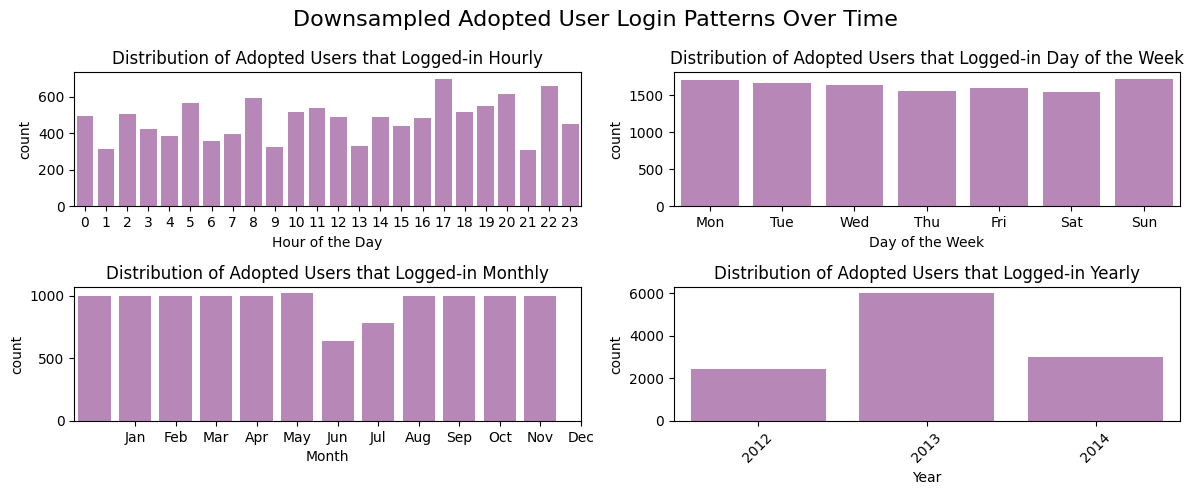

In [25]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot distribution of adopted users hourly
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.hour, color='purple',alpha=0.5 , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Adopted Users that Logged-in Hourly')
axes[0, 0].set_xlabel('Hour of the Day')

# Plot distribution of adopted users by day of the week
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.day_of_week, color='purple',alpha=0.5 , ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Adopted Users that Logged-in Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set meaningful x-labels

# Plot distribution of adopted users by month
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.month, color='purple',alpha=0.5 , ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Adopted Users that Logged-in Monthly')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set meaningful x-labels

# Plot distribution of adopted users by year
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.year, color='purple',alpha=0.5 , ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Adopted Users that Logged-in Yearly')
axes[1, 1].set_xlabel('Year')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability

# Set main title for the entire figure
fig.suptitle('Downsampled Adopted User Login Patterns Over Time', fontsize=16)

plt.tight_layout()
plt.show()

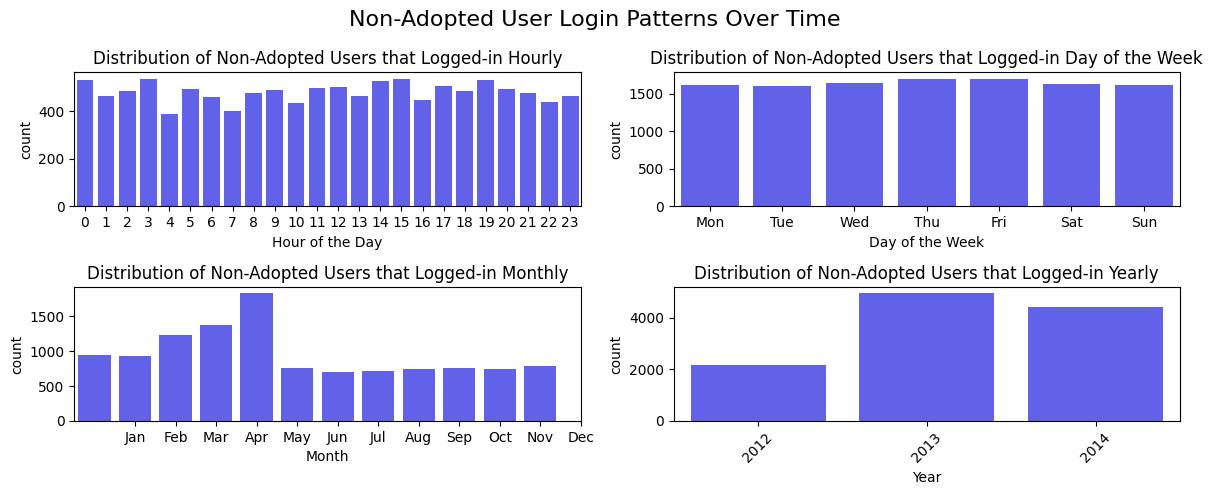

In [26]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot distribution of adopted users hourly
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.hour, color='blue',alpha=0.7 , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Non-Adopted Users that Logged-in Hourly')
axes[0, 0].set_xlabel('Hour of the Day')

# Plot distribution of adopted users by day of the week
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.day_of_week, color='blue',alpha=0.7 , ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Non-Adopted Users that Logged-in Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set meaningful x-labels

# Plot distribution of adopted users by month
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.month, color='blue',alpha=0.7 , ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Non-Adopted Users that Logged-in Monthly')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set meaningful x-labels

# Plot distribution of adopted users by year
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.year, color='blue',alpha=0.7 , ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Non-Adopted Users that Logged-in Yearly')
axes[1, 1].set_xlabel('Year')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability

# Set main title for the entire figure
fig.suptitle('Non-Adopted User Login Patterns Over Time', fontsize=16)

plt.tight_layout()
plt.show()

In [27]:
# Remove duplicate user entries
print('Before duplicated users have been removed:')
print(new_df.shape)
print(not_adopted.shape)
print('-'*20)
new_df = new_df.drop_duplicates(subset='user_id')
not_adopted = not_adopted.drop_duplicates(subset='user_id',keep='first')
print('After duplicated users have been removed:')
print(new_df.shape)
print(not_adopted.shape)


Before duplicated users have been removed:
(161424, 9)
(11520, 9)
--------------------
After duplicated users have been removed:
(1445, 9)
(7378, 9)


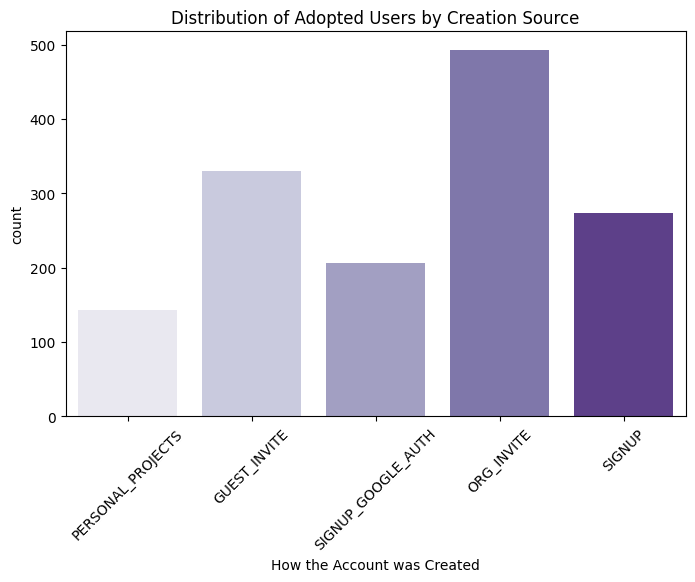

In [28]:
# Adopted Creation_Source
plt.figure(figsize=(8, 5))
sns.countplot(data=new_df, x='creation_source', hue='creation_source', palette='Purples')
plt.title('Distribution of Adopted Users by Creation Source')
plt.xticks(rotation=45)
plt.xlabel('How the Account was Created')
plt.show()

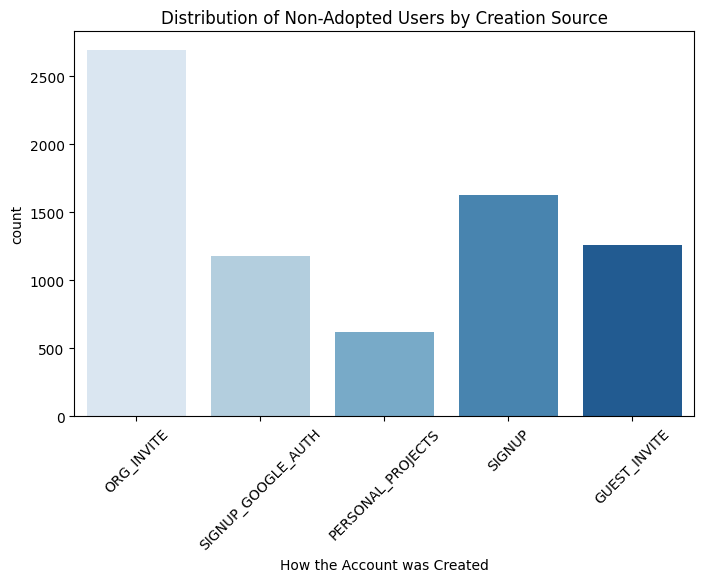

In [29]:
# Not Adopted Creation_Source
plt.figure(figsize=(8, 5))
sns.countplot(data=not_adopted, x='creation_source', hue='creation_source', palette='Blues')
plt.title('Distribution of Non-Adopted Users by Creation Source')
plt.xticks(rotation=45)
plt.xlabel('How the Account was Created')
plt.show()

In [30]:
new_df.columns

Index(['time_stamp', 'user_id', 'creation_time', 'name', 'email',
       'creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id'],
      dtype='object')

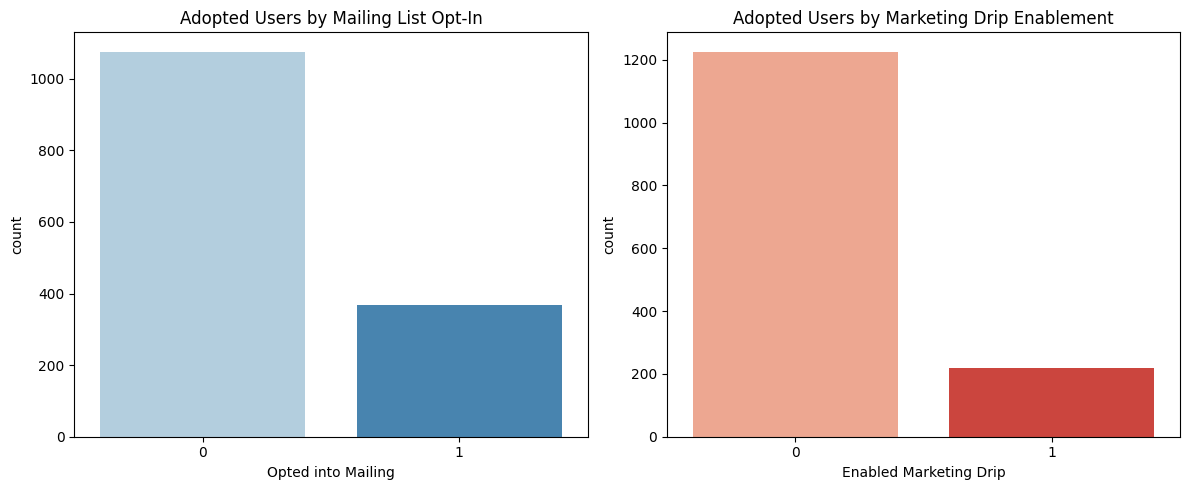

In [31]:
# Opted_in_to_mailing_list, Enabled_for_marketing_drip
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=new_df, x='opted_in_to_mailing_list', hue='opted_in_to_mailing_list', palette='Blues', ax=axes[0], legend=False)
axes[0].set_xlabel('Opted into Mailing')
axes[0].set_title('Adopted Users by Mailing List Opt-In')
sns.countplot(data=new_df, x='enabled_for_marketing_drip', hue='enabled_for_marketing_drip', palette='Reds', ax=axes[1], legend=False)
axes[1].set_title('Adopted Users by Marketing Drip Enablement')
axes[1].set_xlabel('Enabled Marketing Drip')
plt.tight_layout()
plt.show()


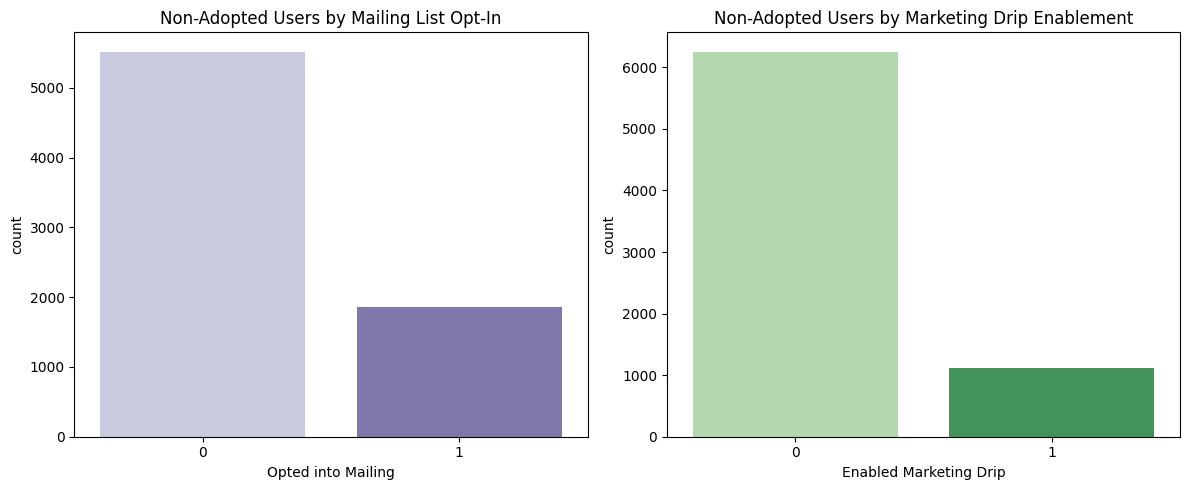

In [32]:
# Opted_in_to_mailing_list, Enabled_for_marketing_drip
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=not_adopted, x='opted_in_to_mailing_list', hue='opted_in_to_mailing_list', palette='Purples', ax=axes[0], legend=False)
axes[0].set_xlabel('Opted into Mailing')
axes[0].set_title('Non-Adopted Users by Mailing List Opt-In')
sns.countplot(data=not_adopted, x='enabled_for_marketing_drip', hue='enabled_for_marketing_drip', palette='Greens', ax=axes[1], legend=False)
axes[1].set_title('Non-Adopted Users by Marketing Drip Enablement')
axes[1].set_xlabel('Enabled Marketing Drip')
plt.tight_layout()
plt.show()


In [33]:
# Identify adopted users
adopted_users = resample_df['user_id'].unique()

# Create a new column 'adopted' in usage_df indicating whether the user is adopted or not
usage_df['adopted'] = np.where(usage_df['user_id'].isin(adopted_users), 1, 0)

# inner join 
data = usage_df.merge(user_df,how='inner', on='user_id')
data.head()

,time_stamp,user_id,adopted,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,2014-04-22 03:53:30,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11
1,2013-11-15 03:45:04,2,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1
2,2013-11-29 03:45:04,2,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1
3,2013-12-09 03:45:04,2,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1
4,2013-12-25 03:45:04,2,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1


In [34]:
data = pd.get_dummies(data, columns=['creation_source'])

# Convert date-time variables 

# We used timestamp to figure out whether a user was adopted or not, we do not need timestamp anymore
# data['time_stamp'] = pd.to_datetime(data['time_stamp'])
# data['login_day_hour'] = data['time_stamp'].dt.hour
# data['login_day_of_week'] = data['time_stamp'].dt.dayofweek
# data['login_month'] = data['time_stamp'].dt.month
data.drop(['time_stamp'], axis=1, inplace=True) 

data['creation_time'] = pd.to_datetime(data['creation_time'])
data['creation_hour'] = data['creation_time'].dt.hour
data['creation_day_of_week'] = data['creation_time'].dt.dayofweek
data['creation_month'] = data['creation_time'].dt.month
data['creation_year'] = data['creation_time'].dt.year
data.drop(['creation_time'], axis=1, inplace=True) 

In [35]:
data.head()

,user_id,adopted,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_hour,creation_day_of_week,creation_month,creation_year
0,1,0,Clausen August,AugustCClausen@yahoo.com,1,0,11,True,False,False,False,False,3,1,4,2014
1,2,0,Poole Matthew,MatthewPoole@gustr.com,0,0,1,False,True,False,False,False,3,4,11,2013
2,2,0,Poole Matthew,MatthewPoole@gustr.com,0,0,1,False,True,False,False,False,3,4,11,2013
3,2,0,Poole Matthew,MatthewPoole@gustr.com,0,0,1,False,True,False,False,False,3,4,11,2013
4,2,0,Poole Matthew,MatthewPoole@gustr.com,0,0,1,False,True,False,False,False,3,4,11,2013


In [36]:
data.shape

(207917, 16)

In [37]:
# drop user_id duplicates
data = data.drop_duplicates(subset='user_id',keep='first')
data.shape

(8823, 16)

In [38]:
data.head()

,user_id,adopted,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_hour,creation_day_of_week,creation_month,creation_year
0,1,0,Clausen August,AugustCClausen@yahoo.com,1,0,11,True,False,False,False,False,3,1,4,2014
1,2,0,Poole Matthew,MatthewPoole@gustr.com,0,0,1,False,True,False,False,False,3,4,11,2013
15,3,0,Bottrill Mitchell,MitchellBottrill@gustr.com,0,0,94,False,True,False,False,False,23,1,3,2013
16,4,0,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,1,True,False,False,False,False,8,1,5,2013
17,5,0,Raw Grace,GraceRaw@yahoo.com,0,0,193,True,False,False,False,False,10,3,1,2013


In [39]:
data['adopted'].value_counts()

adopted
0    7378
1    1445
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

X = data.drop(['adopted', 'name', 'email', 'user_id'], axis=1) 
y = data['adopted']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class weights to address imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Define the parameter grids for different models
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, 20]      
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10]
}

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize classifiers with class weight balancing
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
gb = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42, class_weight='balanced')

# Initialize GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=5), scoring='f1')
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=StratifiedKFold(n_splits=5), scoring='f1')
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=StratifiedKFold(n_splits=5), scoring='f1')

# Perform grid search for each model
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)

# Get the best parameters for each model
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_
best_params_svc = grid_search_svc.best_params_
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best Parameters for Support Vector Machine:", best_params_svc)

# Use the best models for prediction
best_model_rf = grid_search_rf.best_estimator_
best_model_gb = grid_search_gb.best_estimator_
best_model_svc = grid_search_svc.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)
y_pred_gb = best_model_gb.predict(X_test)
y_pred_svc = best_model_svc.predict(X_test)

# Evaluate the models
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))


Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 200}
Best Parameters for Gradient Boosting: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
Best Parameters for Support Vector Machine: {'C': 10, 'gamma': 0.001}
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69      2207
           1       0.23      0.66      0.34       440

    accuracy                           0.58      2647
   macro avg       0.56      0.61      0.52      2647
weighted avg       0.78      0.58      0.63      2647

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2207
           1       0.23      0.16      0.19       440

    accuracy                           0.77      2647
   macro avg       0.54      0.53      0.53      2647
weighted avg       0.74      0.77      0.75      2647

Classification Repor

In [45]:
# Calculate feature importance
feature_importance_rf = best_model_rf.feature_importances_
feature_importance_gb = best_model_gb.feature_importances_

# Sort feature importances for Random Forest
sorted_importance_rf = sorted(zip(X.columns, feature_importance_rf), key=lambda x: x[1], reverse=True)

# Print feature importance for Random Forest
print("Feature Importance for Random Forest:")
for feature, importance in sorted_importance_rf:
    print(f"Feature {feature}: {importance}")

# Sort feature importances for Gradient Boosting
sorted_importance_gb = sorted(zip(X.columns, feature_importance_gb), key=lambda x: x[1], reverse=True)

# Print feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:")
for feature, importance in sorted_importance_gb:
    print(f"Feature {feature}: {importance}")


Feature Importance for Random Forest:
Feature org_id: 0.2816941257326722
Feature creation_month: 0.24901550913344836
Feature creation_year: 0.22240630882842558
Feature creation_hour: 0.09611786004719584
Feature creation_day_of_week: 0.046209402294070376
Feature creation_source_GUEST_INVITE: 0.02528835085542306
Feature creation_source_SIGNUP: 0.019208207695747093
Feature opted_in_to_mailing_list: 0.01629558818465806
Feature enabled_for_marketing_drip: 0.01285533304796971
Feature creation_source_SIGNUP_GOOGLE_AUTH: 0.011075796461934727
Feature creation_source_PERSONAL_PROJECTS: 0.010098528496964387
Feature creation_source_ORG_INVITE: 0.009734989221490532

Feature Importance for Gradient Boosting:
Feature org_id: 0.3854574986431307
Feature creation_hour: 0.18872535658174866
Feature creation_month: 0.13252584943675638
Feature creation_day_of_week: 0.09848132032060282
Feature creation_year: 0.05703669154334483
Feature creation_source_GUEST_INVITE: 0.02773848262503686
Feature creation_source

## Notes and Conclusion

### Enhanced Analysis and Considerations:

1. **Adopted Users Identification**:
   - The process to identify adopted users relies on examining login data within seven-day periods, categorically labeling users as 'adopted' if they logged in three or more times within any of these periods. This methodological precision ensures a clear distinction between engaged and less engaged users.

2. **Data Preparation**:
   - Dropping the `time_stamp` column after identifying adopted users simplifies the dataset and focuses the analysis on user attributes rather than temporal login patterns. Similarly, converting `creation_time` to extract creation hour, day of the week, month, and year before dropping the original timestamp further refines the dataset for analysis, emphasizing the importance of account creation timing over the specific login dates.

3. **Feature Engineering and Model Preparation**:
   - The transformation of `creation_source` into dummy variables allows for a granular analysis of the impact of different account creation sources on user adoption.
   - By eliminating duplicates based on `user_id`, the analysis ensures that each user's data contributes only once, providing a clearer picture of the user base.

4. **Modeling and Predictive Analysis**:
   - The adoption of machine learning models (Random Forest, Gradient Boosting, and Support Vector Machine) with class weights balanced addresses the imbalance in adopted versus non-adopted users, ensuring fair representation in the predictive analysis.
   - The use of GridSearchCV for hyperparameter tuning across different models emphasizes the methodical approach to identifying the most effective predictive model parameters.

5. **Insights from Model Performance**:
   - The Gradient Boosting model showed the highest accuracy among the tested models, suggesting it is the most effective at predicting user adoption based on the given features. However, its performance in distinguishing between adopted and non-adopted users, as seen in the precision and recall for the minority class (adopted users), indicates room for improvement.
   - The relatively low precision and recall for identifying adopted users across all models highlight the challenge of predicting user adoption, suggesting that additional or different features may be necessary for improving model performance.

6. **Feature Importance:**
   - For Random Forest: The organization ID (org_id), creation month, and creation year were the top three features, indicating that the organizational context and timing of account creation play significant roles in predicting user adoption. Interestingly, the creation hour and day of the week also contributed to the model's predictive power, suggesting that the time of account setup could influence user engagement.
   - For Gradient Boosting: Similar to Random Forest, org_id and temporal features (creation hour, month, and day of the week) were highly influential, with org_id being even more dominant in this model. This underscores the importance of organizational dynamics and specific time slots for account creation in user adoption.

7. **Recommendations and Future Directions**:
   - The findings from machine learning model evaluations underline the complexity of predicting user adoption. Future analyses could explore additional user behavior metrics, such as the frequency of certain actions within the app or engagement with specific features, to enhance predictive accuracy.
   - Incorporating user feedback or qualitative data through natural language processing could also offer deeper insights into user engagement and potential predictors of adoption.

### Conclusion Revision:

This analysis has systematically identified factors influencing user adoption, using a combination of user activity patterns, account creation sources, and advanced predictive modeling. Although the Gradient Boosting model demonstrated the highest overall accuracy, the challenge of accurately predicting adopted users highlights the need for a more nuanced understanding of user engagement and behavior. Future strategies to increase user adoption should not only focus on optimizing account creation sources but also consider broader engagement strategies that encourage active participation and sustained interest in the product. Further research incorporating additional behavioral data and qualitative insights could provide a more comprehensive view of the drivers of user adoption.